<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.146568,128.089109,127.936799,0.152309
1,0.0,1.0,47.067808,95.047509,91.779690,-0.219056,243.675951,244.002489,-0.326537
2,0.0,2.0,99.291665,61.179446,95.992578,-0.009959,266.453730,266.520483,-0.066752
3,0.0,3.0,36.059748,81.961304,62.806562,0.054140,190.881754,190.892882,-0.011128
4,0.0,4.0,22.561835,57.403703,99.891733,-0.163465,189.693806,189.973541,-0.279735
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.189110,120.241396,120.125141,0.116256
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.012894,230.880574,230.853054,0.027520
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.058303,203.539103,203.543447,-0.004344
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.064395,116.216705,116.387291,-0.170586


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.146568,128.089109,127.936799,0.152309
1,0.0,1.0,47.067808,95.047509,91.779690,-0.219056,243.675951,244.002489,-0.326537
2,0.0,2.0,99.291665,61.179446,95.992578,-0.009959,266.453730,266.520483,-0.066752
3,0.0,3.0,36.059748,81.961304,62.806562,0.054140,190.881754,190.892882,-0.011128
4,0.0,4.0,22.561835,57.403703,99.891733,-0.163465,189.693806,189.973541,-0.279735
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.189110,120.241396,120.125141,0.116256
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.012894,230.880574,230.853054,0.027520
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.058303,203.539103,203.543447,-0.004344
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.064395,116.216705,116.387291,-0.170586


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    44.623839  37.451801  35.866901  0.146568  128.089109   
      1.0    47.067808  95.047509  91.779690 -0.219056  243.675951   
      2.0    99.291665  61.179446  95.992578 -0.009959  266.453730   
      3.0    36.059748  81.961304  62.806562  0.054140  190.881754   
      4.0    22.561835  57.403703  99.891733 -0.163465  189.693806   
...                ...        ...        ...       ...         ...   
999.0 25.0   22.165046  31.666469  56.220772  0.189110  120.241396   
      26.0   93.324773  99.972234  27.596461 -0.012894  230.880574   
      27.0   28.102838  93.083445  72.411123 -0.058303  203.539103   
      28.0   30.257867  20.848863  55.174370 -0.064395  116.216705   
      29.0   90.716789  93.036058  71.241563  0.180178  265.174588   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    127.936799  0.152309  
      1.0    244.002489 -0.326537  
      2.0    266.520483 -0.066752  
      3.0    190.892882 -0.011128  
      4.0    189.973541 -0.279735  
...                 ...       ...  
999.0 25.0   120.125141  0.116256  
      26.0   230.853054  0.027520  
      27.0   203.543447 -0.004344  
      28.0   116.387291 -0.170586  
      29.0   265.004554  0.170035  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    44.623839  37.451801  35.866901  0.146568  128.089109   
      1.0    47.067808  95.047509  91.779690 -0.219056  243.675951   
      2.0    99.291665  61.179446  95.992578 -0.009959  266.453730   
      3.0    36.059748  81.961304  62.806562  0.054140  190.881754   
      4.0    22.561835  57.403703  99.891733 -0.163465  189.693806   
...                ...        ...        ...       ...         ...   
999.0 25.0   22.165046  31.666469  56.220772  0.189110  120.241396   
      26.0   93.324773  99.972234  27.596461 -0.012894  230.880574   
      27.0   28.102838  93.083445  72.411123 -0.058303  203.539103   
      28.0   30.257867  20.848863  55.174370 -0.064395  116.216705   
      29.0   90.716789  93.036058  71.241563  0.180178  265.174588   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    127.936799  0.152309  
      1.0    244.002489 -0.326537  
      2.0    266.520483 -0.066752  
      3.0    190.892882 -0.011128  
      4.0    189.973541 -0.279735  
...                 ...       ...  
999.0 25.0   120.125141  0.116256  
      26.0   230.853054  0.027520  
      27.0   203.543447 -0.004344  
      28.0   116.387291 -0.170586  
      29.0   265.004554  0.170035  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.146568,128.089109,127.936799,0.152309
1,0.0,1.0,47.067808,95.047509,91.779690,-0.219056,243.675951,244.002489,-0.326537
2,0.0,2.0,99.291665,61.179446,95.992578,-0.009959,266.453730,266.520483,-0.066752
3,0.0,3.0,36.059748,81.961304,62.806562,0.054140,190.881754,190.892882,-0.011128
4,0.0,4.0,22.561835,57.403703,99.891733,-0.163465,189.693806,189.973541,-0.279735
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.189110,120.241396,120.125141,0.116256
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.012894,230.880574,230.853054,0.027520
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.058303,203.539103,203.543447,-0.004344
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.064395,116.216705,116.387291,-0.170586


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    44.623839  37.451801  35.866901  0.146568  128.089109   
      1.0    47.067808  95.047509  91.779690 -0.219056  243.675951   
      2.0    99.291665  61.179446  95.992578 -0.009959  266.453730   
      3.0    36.059748  81.961304  62.806562  0.054140  190.881754   
      4.0    22.561835  57.403703  99.891733 -0.163465  189.693806   
...                ...        ...        ...       ...         ...   
999.0 25.0   22.165046  31.666469  56.220772  0.189110  120.241396   
      26.0   93.324773  99.972234  27.596461 -0.012894  230.880574   
      27.0   28.102838  93.083445  72.411123 -0.058303  203.539103   
      28.0   30.257867  20.848863  55.174370 -0.064395  116.216705   
      29.0   90.716789  93.036058  71.241563  0.180178  265.174588   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    127.936799  0.152309  
      1.0    244.002489 -0.326537  
      2.0    266.520483 -0.066752  
      3.0    190.892882 -0.011128  
      4.0    189.973541 -0.279735  
...                 ...       ...  
999.0 25.0   120.125141  0.116256  
      26.0   230.853054  0.027520  
      27.0   203.543447 -0.004344  
      28.0   116.387291 -0.170586  
      29.0   265.004554  0.170035  

[30000 rows x 7 columns]

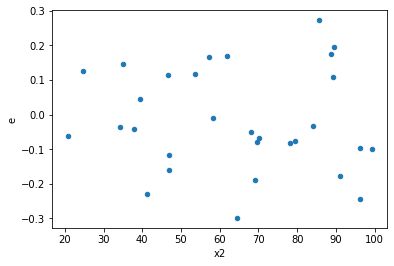

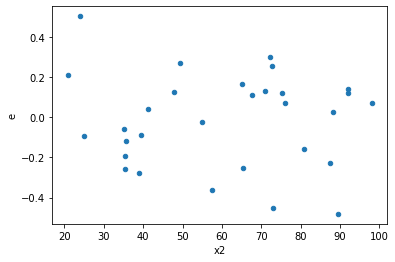

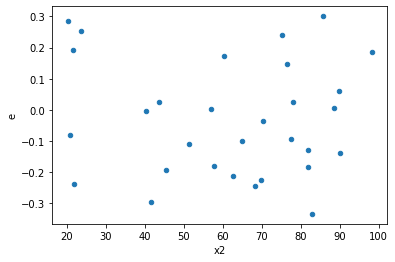

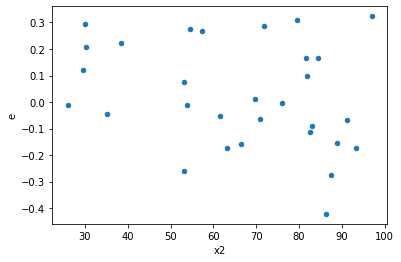

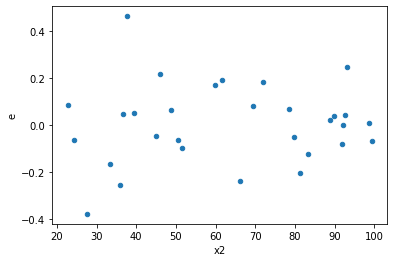

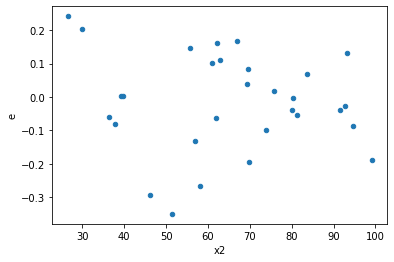

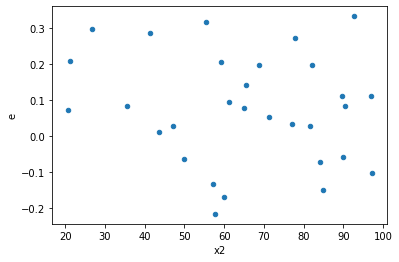

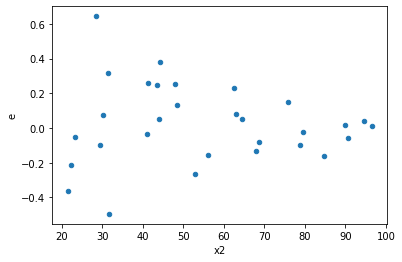

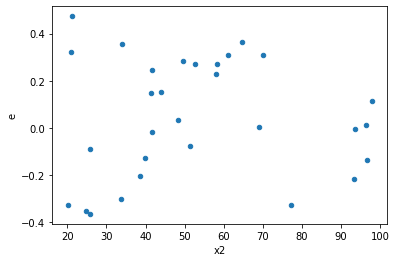

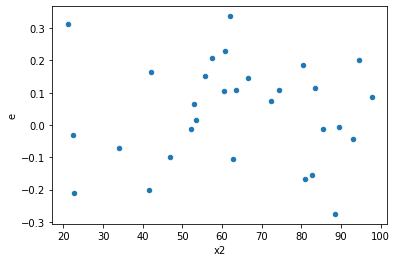

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,9.0,0.31162308475289685,0.5089999250493171,0.03462478719476632,0.056555547227701904,1.6333832439048321,0.4762055621511778,0.7618972189244111,0.2381027810755889,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,0.1386893810583584,0.3064772545300109,0.01540993122870649,0.03405302828111232,2.2098105290487227,0.2531927907555356,0.8734036046222322,0.1265963953777678,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,0.5387735895353868,0.6627163426335153,0.05986373217059853,0.0736351491815017,1.2300460815182328,0.7627856728241822,0.6186071635879089,0.3813928364120911,Reject005=1 : Homoscedasticity
10.0,9.0,9.0,0.13815717271912362,0.25468125965174926,0.015350796968791512,0.028297917739083252,1.8434168464747143,0.3757606013842689,0.8121196993078655,0.18788030069213446,Reject005=1 : Homoscedasticity
11.0,9.0,9.0,0.3347871453845604,0.5574333881964343,0.0371985717093956,0.061937043132937145,1.6650382067570921,0.4592952664578154,0.7703523667710923,0.2296476332289077,Reject005=1 : Homoscedasticity
12.0,9.0,9.0,0.1929435259605071,0.27407142269199586,0.021438169551167455,0.03045238029911065,1.4204748323511747,0.6094735645417821,0.6952632177291089,0.30473678227089107,Reject005=1 : Homoscedasticity
13.0,9.0,9.0,0.30501241846024224,0.5748407187047991,0.03389026871780469,0.0638711909671999,1.8846469321042691,0.358999048208823,0.8205004758955885,0.1794995241044115,Reject005=1 : Homoscedasticity
16.0,9.0,9.0,0.10804950951376768,0.15043116267227244,0.012005501057085298,0.016714573630252492,1.3922429018810536,0.6299906210377157,0.6850046894811421,0.3149953105188579,Reject005=1 : Homoscedasticity
20.0,9.0,9.0,0.3041684113341957,0.4434729651122953,0.033796490148243964,0.04927477390136614,1.4579849471122202,0.5833142010705308,0.7083428994647346,0.2916571005352654,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.6456296684415161,0.2649613058040969,0.07173662982683512,0.0294401450893441,0.41039208505347397,0.20073233665209894,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,0.31162308475289685,0.5089999250493171,0.03462478719476632,0.056555547227701904,1.6333832439048321,0.4762055621511778,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,0.5690045334439837,0.43606604002753574,0.06322272593822041,0.04845178222528175,0.7663665478870297,0.6982562335254456,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,0.3670805759498821,0.20206558535349453,0.04078673066109801,0.022451731705943837,0.5504665694462754,0.3871242090833464,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,0.1386893810583584,0.3064772545300109,0.01540993122870649,0.03405302828111232,2.2098105290487227,0.2531927907555356,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,0.536094233188695,0.3592892834248737,0.059566025909855,0.03992103149165263,0.6701980009891483,0.5605755146977108,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,0.5310345726056837,0.350622902630274,0.059003841400631515,0.03895810029225267,0.6602637958388198,0.5461370789024643,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,1.0351425519493191,0.3690070513189741,0.11501583910547991,0.04100078347988601,0.35647945360190425,0.14039260055791997,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,0.5387735895353868,0.6627163426335153,0.05986373217059853,0.0736351491815017,1.2300460815182328,0.7627856728241822,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      884
Reject005=0 : Heteroscedasticity    116
Name: Result_test, dtype: int64